# Interacting with CerebralCortex Data

Cerebral Cortex is MD2K's big data cloud tool designed to support population-scale data analysis, visualization, model development, and intervention design for mobile-sensor data. It provides the ability to do machine learning model development on population scale datasets and provides interoperable interfaces for aggregation of diverse data sources.

This page provides an overview of the core Cerebral Cortex operations to familiarilze you with how to discover and interact with different sources of data that could be contained within the system.

_Note:_ While some of these examples are showing generated data, they are designed to function on real-world mCerebrum data and the signal generators were built to facilitate the testing and evaluation of the Cerebral Cortex platform by those individuals that are unable to see those original datasets or do not wish to collect data before evaluating the system.

## Import packages
Python projects always require a number of imports and the specifics are located in the `util/dependencies.py` file.  The `settings` import specifies the specific `USER_ID` that is utilized within this demonstration.  These _ids_ are the unique user identifiers within Cerebral Cortex.

In [53]:
%reload_ext autoreload
from util.dependencies import *
from settings import USER_ID
from cerebralcortex.util.helper_methods import get_study_names

## CerebralCortex Configurations Path

In [54]:
cc_config = "/home/md2k/cc_conf/"

## List all the available studies

In [34]:
get_study_names(cc_config)

['demo', 'default', 'default']

## Create CerebralCortex object
The __Kernel__ object is the main entry point to the Cerebral Cortex system. It is necessary to pass a configuration directory that tells it all the different parameters it needs to communicate with its other components.  You can examine the details of these configurations for this server by looking at the files contained in the `cc_conf` folder.

In [55]:
CC = Kernel(cc_config, study_name="default")

## Getting help
These are the typical ways to learn more about the code and objects within Cerebral Cortex.
1. Intelligent context help by typing the object or class into a cell followed by the period, `.`, then when you press `<tab>` a popup will appear showing additional information about the object or method. Uncomment the first line to try it out.
2. Formatting the commands with a question mark retrieves the documentation strings and examples when appropriate.  `? CC.list_streams`
3. Reading the documentation on our site: https://cerebralcortex-kernel.readthedocs.io/en/latest/

In [36]:
# CC.

? CC.list_streams


Signature:  CC.list_streams() -> List[str]
Docstring:
Get all the available stream names with metadata

Returns:
    List[str]: list of available streams metadata

Examples:
    >>> CC = Kernel("/directory/path/of/configs/", study_name="default")
    >>> CC.list_streams()
File:      /opt/conda/lib/python3.6/site-packages/cerebralcortex/kernel.py
Type:      method


## Generate some sample data for phone battery
This helper method utilizes Cerebral Cortex (`CC`), the `USER_ID`, and a `stream_name` to generate fake data for for the purposes of these examples.  If you have real-world data, this step can be skipped and your stream names adjusted to make your dataset. This is disabled for this demonstration to not create too much data at once.

In [37]:
gen_phone_battery_data(CC, user_id=USER_ID, stream_name="BATTERY--org.md2k.phonesensor--PHONE")

Phone battery data is generated successfully.


## List available streams in CC
One of the first things a researcher typically wants to know is what data is available to explore.  The kernel offers a couple of methods to facilitate this. The first, `list_streams`, is shown below and exposes all the available streams within the system. 

In [38]:
streams = CC.list_streams()
for stream in streams:
    print(stream)

BATTERY--org.md2k.phonesensor--PHONE


### Search streams by name
For larger deployments, the list of all streams may be too long to easily sort through, or you may be interested in a specific type of information. In this case, the second method `search_stream` would be more applicable. This search returns streams that have a substring match of the search parameter.

In [39]:
results = CC.search_stream("battery")
for result in results:
    print(result)

## Get stream data
Once a stream is identified by name, it needs to be loaded into a `DataStream` object by calling `get_stream`.  This pulls into a single object all the metadata associated with the stream as well as a reference to the data so that it can be accessed as needed.

In [40]:
battery_data_stream = CC.get_stream("BATTERY--org.md2k.phonesensor--PHONE")

## Print stream statistics
The summary method displays some basic statistics about the datastream such as the number of points as well as max, mean, stdev, and min values.  These statistics are shown for each column of data in the stream.

In [41]:
battery_data_stream.summary()

+-------+-----------------+-------+------------------------------------+
|summary|battery_level    |version|user                                |
+-------+-----------------+-------+------------------------------------+
|count  |1998             |1998   |1998                                |
|mean   |95.44044044044044|2.0    |null                                |
|stddev |2.90841787713326 |0.0    |null                                |
|min    |90               |2      |00000000-afb8-476e-9872-6472b4e66b68|
|max    |100              |2      |00000000-afb8-476e-9872-6472b4e66b68|
+-------+-----------------+-------+------------------------------------+



## Print stream data
Any datastream can be printed or visualized to the screen; however, it is important to limit, in this case to 3, the number of rows to show.  Streams can contain millions to billions of samples depending on the size of the system and even for the case of a single individual wearing a motion-capture band, this number can exceed 30,000,000 samples for a short two week study.  Cerebral Cortex defaults to settings that try to not load all the data unless needed.

This example prints the first 3 rows of the loaded battery stream and it contains 5 columns. 
- __timestamp__: This is the time in UTC that the sample was recorded at
- __localtime__: This is the time in the local timezone that the sample was recorded at
- __battery_level__: This is the battery percentage of the smartphone device
- __version__: This is the Cerebral Cortex version code assigned to this stream.
- __user__: This is the specific UUID that identifies the user that owns this data point

In [42]:
battery_data_stream.show(3, truncate=False) 

+-------------------+-------------------+-------------+-------+------------------------------------+
|timestamp          |localtime          |battery_level|version|user                                |
+-------------------+-------------------+-------------+-------+------------------------------------+
|2019-01-09 11:49:28|2019-01-09 06:49:28|92           |2      |00000000-afb8-476e-9872-6472b4e66b68|
|2019-01-09 11:49:29|2019-01-09 06:49:29|92           |2      |00000000-afb8-476e-9872-6472b4e66b68|
|2019-01-09 11:49:30|2019-01-09 06:49:30|92           |2      |00000000-afb8-476e-9872-6472b4e66b68|
+-------------------+-------------------+-------------+-------+------------------------------------+
only showing top 3 rows



## Print stream metadata
Each stream contains 

- __name__: The complete string name of this stream
- __description__: A text description of this stream
- __data_descriptor__: A list of objects that describe the data components of the stream (e.g. battery_level)
    - ...
    - __name__: data descriptor name
    - __type__: the object type (e.g. integer, float, string, ...)
    - __optional_fields__: any number of arbitrary fields can be added when creating a stream and will appear here 
    - ...
- __annotations__: Currently unused but designed to link streams together such as a **data quality** and the corresponding **raw** stream
- __input_streams__: Currently unused but designed to specify which streams were utilized to generate this stream
- __modules__: Metadata about the algorithm/code module the generated this data
  - __name__: The name of the code module
  - __version__: The version of the code module
  - __attributes__: Arbitrary attributes specified by _key-value_ pairs
  - __authors__: A set of author names and emails


In [43]:
metadata = battery_data_stream.get_metadata(version=1)
print(metadata)

{
    "annotations": [],
    "data_descriptor": [
        {
            "attributes": {
                "description": "current battery charge"
            },
            "name": "battery_level",
            "type": "LongType"
        }
    ],
    "description": "this is a test-stream.",
    "input_streams": [],
    "modules": [
        {
            "attributes": {
                "attribute_key": "attribute_value"
            },
            "authors": [
                {
                    "test_user": "test_user@test_email.com"
                }
            ],
            "name": "battery",
            "version": "1.2.4"
        }
    ],
    "name": "BATTERY--org.md2k.phonesensor--PHONE"
}


## Filter Data

Cerebral Cortex returns all data associated with a stream name, which is great for performing operations and intial exploration; however, it allows for the filtering of these streams of data to isolate certain criterias such as value ranges or specific columns or users.

### Filter data by data column
The first major filtering capability allows for named columns to have logical operations applied to them. The `filter` method is applicable to the data stream object and accepts three parameters.  
- column name: (e.g. battery_level)
- operation: (e.g. >, <, ==, >=, ...)
- criteria: (e.g. 97)



In [44]:
filtered_data = battery_data_stream.filter("battery_level>97")
filtered_data.show(3,truncate=False)

+-------------------+-------------------+-------------+-------+------------------------------------+
|timestamp          |localtime          |battery_level|version|user                                |
+-------------------+-------------------+-------------+-------+------------------------------------+
|2019-01-09 11:39:08|2019-01-09 06:39:08|98           |2      |00000000-afb8-476e-9872-6472b4e66b68|
|2019-01-09 11:39:09|2019-01-09 06:39:09|98           |2      |00000000-afb8-476e-9872-6472b4e66b68|
|2019-01-09 11:39:10|2019-01-09 06:39:10|98           |2      |00000000-afb8-476e-9872-6472b4e66b68|
+-------------------+-------------------+-------------+-------+------------------------------------+
only showing top 3 rows



### Filter data by user
User filtering is a special case due to the way Cerebral Cortex stores data and a dedicated method, `filter_user`, is provided which accepts a single `USER_ID` as input.  This example illustrates filtering by the prior user id.

In [45]:
filtered_user_data = battery_data_stream.filter_user("00000000-afb8-476e-9872-6472b4e66b68")
filtered_user_data.show(3,truncate=False)

+-------------------+-------------------+-------------+-------+------------------------------------+
|timestamp          |localtime          |battery_level|version|user                                |
+-------------------+-------------------+-------------+-------+------------------------------------+
|2019-01-09 11:49:28|2019-01-09 06:49:28|92           |2      |00000000-afb8-476e-9872-6472b4e66b68|
|2019-01-09 11:49:29|2019-01-09 06:49:29|92           |2      |00000000-afb8-476e-9872-6472b4e66b68|
|2019-01-09 11:49:30|2019-01-09 06:49:30|92           |2      |00000000-afb8-476e-9872-6472b4e66b68|
+-------------------+-------------------+-------------+-------+------------------------------------+
only showing top 3 rows



### Filter data by version
Version filtering is a special case due to the way Cerebral Cortex stores data. A dedicated method, `filter_version`, is provided which accepts a single version as input. 

In [46]:
filtered_version_data = battery_data_stream.filter_version(1)
filtered_version_data.show(3,truncate=False)

+---------+---------+-------------+-------+----+
|timestamp|localtime|battery_level|version|user|
+---------+---------+-------------+-------+----+
+---------+---------+-------------+-------+----+



## Convert datastream object into Pandas dataframe
The data representations and visualizations that have been shown so far provide a way for basic data inspections; however, these are not directly suitable for more complex interactions or analysis.  Cerebral Cortex provide a `to_pandas` method to transform the datastream data into a [Pandas](https://pandas.pydata.org/) dataframe object. From this point, anything that Pandas can do is supported.


In [47]:
pdf = battery_data_stream.to_pandas()
pdf.data

,timestamp,localtime,battery_level,version,user
882,2019-01-09 11:35:00,2019-01-09 06:35:00,100,2,00000000-afb8-476e-9872-6472b4e66b68
758,2019-01-09 11:35:00,2019-01-09 06:35:00,100,2,00000000-afb8-476e-9872-6472b4e66b68
...,...,...,...,...,...
261,2019-01-09 11:51:38,2019-01-09 06:51:38,90,2,00000000-afb8-476e-9872-6472b4e66b68
130,2019-01-09 11:51:38,2019-01-09 06:51:38,90,2,00000000-afb8-476e-9872-6472b4e66b68


## Plot stream data
Visualization is a key part to gaining an understanding of the data and performing data analysis.  The datastream contains a set of basic plotting operations that are accessible through the `.plot()` method or through other direct mechanisms.  Please see the `plotting_demo` tutorial page for a complete set of plotting examples.

This plot is interactive; try using your mouse to explore the data.

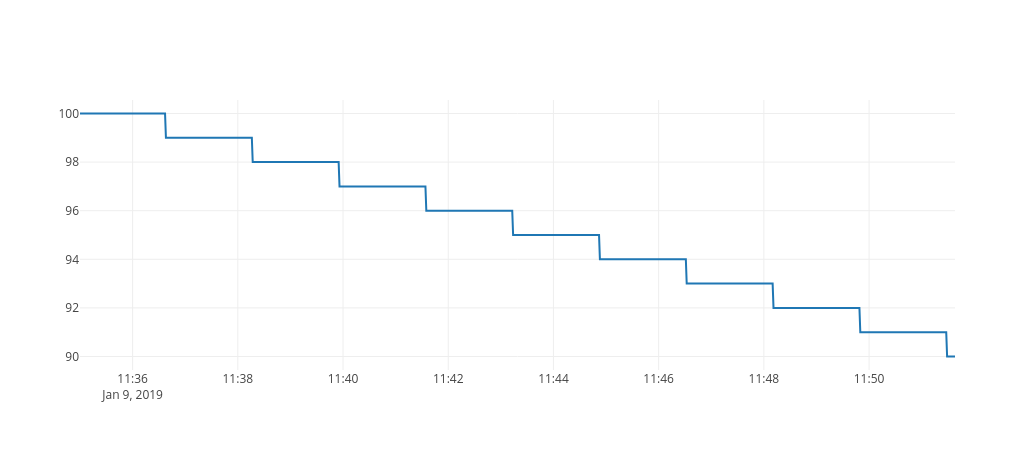

In [48]:
battery_data_stream.plot()

## Compute some basic stats
Cerebral Cortex provides computationally efficient helper functions for generating basic statistics over the datastream. These functions include: _average, sqrt, sum, variance, stdev, min, max_

In [49]:
average = battery_data_stream.compute_average()
average.show(4, False)

minimum = battery_data_stream.compute_min()
minimum.show(4, False)

+------------------------------------+-----------------+
|user                                |battery_level    |
+------------------------------------+-----------------+
|00000000-afb8-476e-9872-6472b4e66b68|95.44044044044044|
+------------------------------------+-----------------+

+------------------------------------+-------------+
|user                                |battery_level|
+------------------------------------+-------------+
|00000000-afb8-476e-9872-6472b4e66b68|90           |
+------------------------------------+-------------+



## Perform windowing operation on data
Many times it is preferable to group the data into windows before applying an algorithm or computation to the data.  The basic windowing function groups data into non-overlapping chunks and returns a data stream with each cell containing all the data associated with that particular window.

In [50]:
windowed_data = battery_data_stream.window(windowDuration=60)
windowed_data.show(3)

+--------------------+-------+--------------------+--------------------+
|                user|version|              window|       battery_level|
+--------------------+-------+--------------------+--------------------+
|00000000-afb8-476...|      2|[2019-01-09 11:48...|[93, 93, 93, 93, ...|
|00000000-afb8-476...|      2|[2019-01-09 11:49...|[92, 92, 92, 92, ...|
|00000000-afb8-476...|      2|[2019-01-09 11:39...|[98, 98, 98, 98, ...|
+--------------------+-------+--------------------+--------------------+
only showing top 3 rows



### Sliding windows
Another common windowing technique can be accomplished by adding an `offset` parameter to the parameter list which causes the windows to move by a partial window size instead of the whole window.

In [51]:
windowed_data = battery_data_stream.window(windowDuration=60, slideDuration=5)
windowed_data.show(3)

+--------------------+-------+--------------------+--------------------+
|                user|version|              window|       battery_level|
+--------------------+-------+--------------------+--------------------+
|00000000-afb8-476...|      2|[2019-01-09 11:43...|[96, 96, 96, 96, ...|
|00000000-afb8-476...|      2|[2019-01-09 11:45...|[94, 94, 94, 94, ...|
|00000000-afb8-476...|      2|[2019-01-09 11:44...|[95, 95, 95, 95, ...|
+--------------------+-------+--------------------+--------------------+
only showing top 3 rows



## Computation over windows
There are two mechanisms where windowed data can have computation applied.  First, some of the core methods such as `compute_average` or `compute_variance` contain optimized implementations of these algorithms which more efficiently computes the desired outcome by internally applying the windowing algorithms.  Second, a more generic approach comes from explicitly creating the windows and applying a particular computation to it. This will be discussed in another panel.

In [52]:
average = battery_data_stream.compute_average(windowDuration=60)
average.show(4, False)

+------------------------------------+------------------------------------------+-----------------+
|user                                |window                                    |battery_level    |
+------------------------------------+------------------------------------------+-----------------+
|00000000-afb8-476e-9872-6472b4e66b68|[2019-01-09 11:42:00, 2019-01-09 11:43:00]|96.0             |
|00000000-afb8-476e-9872-6472b4e66b68|[2019-01-09 11:51:00, 2019-01-09 11:52:00]|90.74358974358974|
|00000000-afb8-476e-9872-6472b4e66b68|[2019-01-09 11:36:00, 2019-01-09 11:37:00]|99.63333333333334|
|00000000-afb8-476e-9872-6472b4e66b68|[2019-01-09 11:37:00, 2019-01-09 11:38:00]|99.0             |
+------------------------------------+------------------------------------------+-----------------+
only showing top 4 rows

